In [2]:
# sqlalchemy core
#Installationer
!pip install sqlalchemy
#En bro mellan sqlalchemy och databasen
!pip install pyodbc 

In [3]:
#Importera libraries
from sqlalchemy import create_engine, MetaData, Table, inspect
import pandas as pd
import numpy as np

In [4]:
#Skapa engine
#Instruktioner om hur man kopplar upp sig till databasen
#Dialekt: Olika SQL-versioner (MSSQL, MySQL ..) kräver olika "dialekter"
#Val av dialekt: pyodbc
#Pool: Vart databasen finns att koppla upp sig mot
#Databas: MSSQL
def new_engine(dialect, server, database, user=None, password=None, integrated_security=True):
    if integrated_security:
        # For windows authentication
        eng = f"{dialect}://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"
    else:
         # For SQL Server authentication
        eng = f"{dialect}://{user}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
    print(eng)
    print("dd")
    #anropa create engine med string skapad ovan.
    return create_engine(eng)

In [5]:
engine = new_engine('mssql', 'DESKTOP-RC5L303', 'AdventureWorks2022', integrated_security=True)

mssql://DESKTOP-RC5L303/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server
dd


In [6]:
print(type(engine))

<class 'sqlalchemy.engine.base.Engine'>


In [7]:
# Koppla ihop databas och python med engine.connect -metoden
connection = engine.connect()

In [8]:
print(type(connection))

<class 'sqlalchemy.engine.base.Connection'>


In [9]:
#Inspekt-funktionen
inspector = inspect(engine)
schemas = inspector.get_schema_names()
print(schemas)

['db_accessadmin', 'db_backupoperator', 'db_datareader', 'db_datawriter', 'db_ddladmin', 'db_denydatareader', 'db_denydatawriter', 'db_owner', 'db_securityadmin', 'dbo', 'guest', 'HumanResources', 'INFORMATION_SCHEMA', 'Person', 'Production', 'Purchasing', 'Sales', 'sys']


In [10]:
# Schemas är kategorier, för organisering
for schema in schemas:
    print(schema)

db_accessadmin
db_backupoperator
db_datareader
db_datawriter
db_ddladmin
db_denydatareader
db_denydatawriter
db_owner
db_securityadmin
dbo
guest
HumanResources
INFORMATION_SCHEMA
Person
Production
Purchasing
Sales
sys


In [11]:
# Print alla table namn under schema Sales
print(inspector.get_table_names(schema='Sales'))

['CountryRegionCurrency', 'CreditCard', 'Currency', 'CurrencyRate', 'Customer', 'PersonCreditCard', 'SalesOrderDetail', 'SalesOrderHeader', 'SalesOrderHeaderSalesReason', 'SalesPerson', 'SalesPersonQuotaHistory', 'SalesReason', 'SalesTaxRate', 'SalesTerritory', 'SalesTerritoryHistory', 'ShoppingCartItem', 'SpecialOffer', 'SpecialOfferProduct', 'Store']


In [12]:
# Print alla kolumner i tabell-namnet Customer
for col in inspector.get_columns(table_name='Customer', schema='Sales'):
    print(col['name'])

CustomerID
PersonID
StoreID
TerritoryID
AccountNumber
rowguid
ModifiedDate


## Query till databas

In [13]:
# .read_sql() -metod
# sql: sql command som query utför
# con: kopplingen till databasen
df = pd.read_sql(sql="SELECT * from Sales.Customer", con=connection)

In [14]:
df.head(12)

,CustomerID,PersonID,StoreID,TerritoryID,AccountNumber,rowguid,ModifiedDate
0,1,NaN,934.0,1,AW00000001,3F5AE95E-B87D-4AED-95B4-C3797AFCB74F,2014-09-12 11:15:07.263
1,2,NaN,1028.0,1,AW00000002,E552F657-A9AF-4A7D-A645-C429D6E02491,2014-09-12 11:15:07.263
2,3,NaN,642.0,4,AW00000003,130774B1-DB21-4EF3-98C8-C104BCD6ED6D,2014-09-12 11:15:07.263
3,4,NaN,932.0,4,AW00000004,FF862851-1DAA-4044-BE7C-3E85583C054D,2014-09-12 11:15:07.263
4,5,NaN,1026.0,4,AW00000005,83905BDC-6F5E-4F71-B162-C98DA069F38A,2014-09-12 11:15:07.263
5,6,NaN,644.0,4,AW00000006,1A92DF88-BFA2-467D-BD54-FCB9E647FDD7,2014-09-12 11:15:07.263
6,7,NaN,930.0,1,AW00000007,03E9273E-B193-448E-9823-FE0C44AEED78,2014-09-12 11:15:07.263
7,8,NaN,1024.0,5,AW00000008,801368B1-4323-4BFA-8BEA-5B5B1E4BD4A0,2014-09-12 11:15:07.263
8,9,NaN,620.0,5,AW00000009,B900BB7F-23C3-481D-80DA-C49A5BD6F772,2014-09-12 11:15:07.263
9,10,NaN,928.0,6,AW00000010,CDB6698D-2FF1-4FBA-8F22-60AD1D11DABD,2014-09-12 11:15:07.263


In [15]:
multijoin_sql ="""
SELECT
    c.CustomerID,
    c.StoreID,
    c.AccountNumber,
    soh.SalesOrderID,
    sod.ProductID
FROM Sales.Customer AS c inner join Sales.SalesOrderHeader AS soh
    ON c.CustomerID = soh.CustomerID
INNER JOIN Sales.SalesOrderDetail AS sod
    ON soh.SalesOrderID = sod.SalesOrderID
"""
join_df = pd.read_sql(sql=multijoin_sql, con=connection)

In [16]:
join_df.head()

,CustomerID,StoreID,AccountNumber,SalesOrderID,ProductID
0,29580,518.0,AW00029580,43665,707
1,29614,592.0,AW00029614,43668,707
2,29844,1086.0,AW00029844,43673,707
3,29824,1044.0,AW00029824,43677,707
4,29889,1184.0,AW00029889,43678,707


# En statistisk analys 

,Name,Total Orders
0,AWC Logo Cap,8311
1,Water Bottle - 30 oz.,6815
2,"Sport-100 Helmet, Blue",6743
3,"Long-Sleeve Logo Jersey, L",6592
4,"Sport-100 Helmet, Black",6532


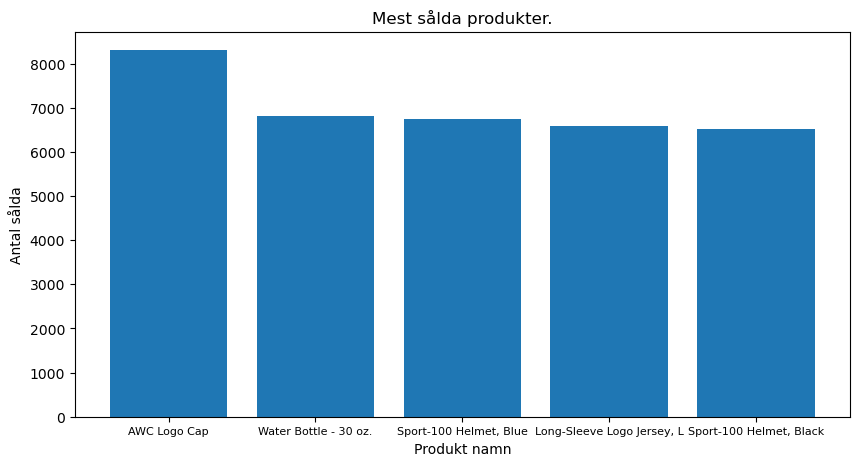

In [56]:
# Jag vi kunde titta på vilka produkter som säljer mest, via Product och SalesOrderDetail-tabellerna, 
# samt nyckeln ProductID, och det är en keps. 

Sales_Most_Sold_sql ="""
SELECT TOP 10 p.Name, SUM(sod.OrderQty) AS [Total Orders]
FROM Production.Product p JOIN Sales.SalesOrderDetail sod 
ON p.ProductID = sod.ProductID GROUP BY Name
ORDER BY [Total Orders] DESC;

"""
# TOP och limit fungerade inte, fick använda slice nedan.

Sales_Most_Sold_sql_df = pd.read_sql(sql=Sales_Most_Sold_sql, con=connection)
Sales_Most_Sold_sql_df.head(5)

product_most_sold = Sales_Most_Sold_sql_df.iloc[:5, 1]
product_most_sold_name = Sales_Most_Sold_sql_df.iloc[:5, 0]
x1 = product_most_sold.to_list()
x2 = product_most_sold_name.to_list()
fig, axs = plt.subplots(figsize = (10, 5))

axs.bar(x2, x1)
axs.set_title("Mest sålda produkter.")
axs.set_xlabel("Produkt namn")
axs.set_ylabel("Antal sålda")
plt.xticks(x2, fontsize = 8);

Sales_Most_Sold_sql_df.head(5)

,Name,Total Orders,Total Price,Total Cost,Total Earnings
0,"Mountain-200 Black, 38",1470,2.216246e+06,1.840413e+06,375833.0914
1,"Mountain-200 Black, 46",1036,1.666953e+06,1.297053e+06,369900.2375
2,"Mountain-200 Black, 42",1262,1.934267e+06,1.580000e+06,354266.3394
3,"Mountain-200 Silver, 46",1033,1.658577e+06,1.307385e+06,351192.4773
4,"Mountain-200 Silver, 38",1164,1.817073e+06,1.473181e+06,343891.4132


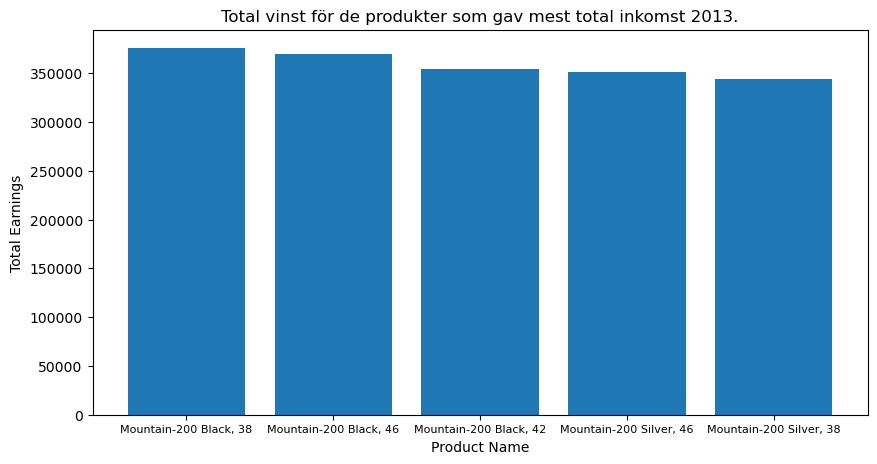

In [54]:
# I min statistiska analys tänkte jag titta vidare på de mest sålda varorna, 
# och jämföra med produktionskostnaderna för att se vilken vara som faktiskt är mest lönsam. 
# Jag ska även göra ett konfidensintervall (95%) över hur mycket den mest inkomstbringande varan säljer på en månad. . 

Sales_Total_Earnings_sql ="""
SELECT TOP 15 p.Name, SUM(sod.OrderQty) AS [Total Orders], 
	sum(sod.UnitPrice * sod.OrderQty) AS [Total Price],
	sum(p.StandardCost * sod.OrderQty) AS [Total Cost],
	sum(sod.UnitPrice * sod.OrderQty - p.StandardCost * sod.OrderQty) AS [Total Earnings]
	FROM Production.Product p JOIN Sales.SalesOrderDetail sod 
	ON p.ProductID = sod.ProductID 
	JOIN Sales.SalesOrderHeader soh on soh.SalesOrderID = sod.SalesOrderID  
	WHERE soH.OrderDate >= '2013-01-01' AND soh.OrderDate < '2014-01-01'
	GROUP BY Name ORDER BY [Total Earnings] DESC;
"""
# TOP och limit fungerade inte, fick använda slice nedan.

Sales_Total_Earnings_sql_df = pd.read_sql(sql=Sales_Total_Earnings_sql, con=connection)

product_total_earnings = Sales_Total_Earnings_sql_df.iloc[:5, 4]
product_name = Sales_Total_Earnings_sql_df.iloc[:5, 0]
x1 = product_total_earnings.to_list()
x2 = product_name.to_list()
fig, axs = plt.subplots(figsize = (10, 5))

axs.bar(x2, x1)
axs.set_title("Total vinst för de produkter som gav mest total inkomst 2013.")
axs.set_xlabel("Product Name")
axs.set_ylabel("Total Earnings")
plt.xticks(x2, fontsize = 8);

Sales_Total_Earnings_sql_df.head(5)
# I min analys fann jag även produkter som gav negativ total earning, genom att ändra till ASC.
# Mer om det står i rapporten.

standard deviation: 15290.765933667752

t value: 2.200985160082949

mean: 31319.42428333334

Medelvinsten per månad ligger mellan 21604.135113051223 och 41034.71345361546 med 95% konfidensgrad.

                      Name  Quantity  Total Earnings  MonthNum
0   Mountain-200 Black, 38        93      15937.4814         1
1   Mountain-200 Black, 38       100       9222.7102         2
2   Mountain-200 Black, 38       141      12397.4883         3
3   Mountain-200 Black, 38       118      16194.0607         4
4   Mountain-200 Black, 38        86      26881.5930         5
5   Mountain-200 Black, 38       181      47642.6897         6
6   Mountain-200 Black, 38       158      31938.4035         7
7   Mountain-200 Black, 38        89      36830.0183         8
8   Mountain-200 Black, 38       151      33679.6032         9
9   Mountain-200 Black, 38       134      42455.5898        10
10  Mountain-200 Black, 38        89      48763.9663        11
11  Mountain-200 Black, 38       130      53889.4

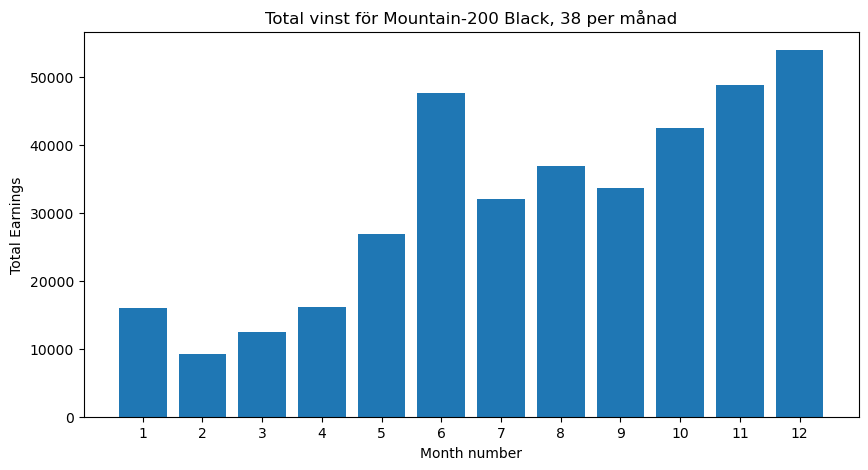

In [55]:
# Här följer en analys av hur den mest inkomstbringande varan säljer månadsvis över samma år, i total inkomst. 

Sales_per_month_sql ="""
SELECT p.Name, SUM(sod.OrderQty) AS Quantity, 
sum(sod.UnitPrice * sod.OrderQty - p.StandardCost * sod.OrderQty) AS [Total Earnings], 
	MONTH(soh.[OrderDate]) AS MonthNum 
	FROM Production.Product p JOIN Sales.SalesOrderDetail sod ON
	p.ProductID = sod.ProductID JOIN [Sales].[SalesOrderHeader] soh 
	ON soh.SalesOrderID = sod.SalesOrderID
	WHERE p.Name LIKE 'Mountain-200 Black, 38' AND 
	soH.OrderDate >= '2013-01-01' AND soh.OrderDate < '2014-01-01'
	GROUP BY p.Name, MONTH(soh.[OrderDate]);

"""
Sales_per_month_sql_df = pd.read_sql(sql=Sales_per_month_sql, con=connection)

# Liten sample (12), även om varje sample innehåller fler samples i form av OrderQty
# Jag använder t-värde till konfidensintervallet.
# Det verkar inte vara något speciellt extrem-värde, vilket är bra.

import statistics
# Använder iloc för att spara ner kolumn på plats 2.
total_earnings_data = Sales_per_month_sql_df.iloc[:, 2]

# Nedan räknar jag ut standardavvikelsen med stdev
sample_std = statistics.stdev(total_earnings_data)
print("standard deviation:", sample_std)
print()

import scipy.stats
# t-värdet fås med konfidensgrad q 95% ("två-svansat"), 11 frihetsgrader
t_value = scipy.stats.t.ppf(q=1-.05/2,df=11)
print("t value:", t_value)
print()

# Söker medelvärdet
sample_mean = np.mean(total_earnings_data)
print("mean:", sample_mean)
print()

# Uträkning av nedre och övre gräns, med formeln för t-värde.
import math
ci_lower = sample_mean - t_value * sample_std / math.sqrt(12)
ci_upper = sample_mean + t_value * sample_std / math.sqrt(12)

# Resultaten.
print("Medelvinsten per månad ligger mellan", ci_lower, "och", ci_upper, "med 95% konfidensgrad.")
print()

print(Sales_per_month_sql_df.head(12))

import matplotlib.pyplot as plt
month_data = Sales_per_month_sql_df.iloc[:, 3]
x1 = total_earnings_data.to_list()
x2 = month_data.to_list()
fig, axs = plt.subplots(figsize = (10, 5))

axs.bar(x2, x1)
axs.set_title("Total vinst för Mountain-200 Black, 38 per månad")
axs.set_xlabel("Month number")
axs.set_ylabel("Total Earnings")
plt.xticks(x2);


# Det verkar som att försäljningen ökar, och därför kanske det inte går att använda resultatet för att förutspå framtiden.
# Kanske att det hade gått att titta på någon medelökning.
# I analysen ser jag något annat intressant, skillnaden mellan quantity vs total earnings, mer om det finns i rapporten.